In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error, mean_squared_error



# Define butter_filter function
def butter_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Load CSV files into DataFrames
data1 = pd.read_csv('Subject 1 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data2 = pd.read_csv('Subject 2 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data3 = pd.read_csv('Subject 3 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])

# Drop rows with missing values
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()

# Set cutoff frequency and sampling frequency
cutoff_freq = 1 # Hz
fs = 1 / np.mean(np.diff(data1['Time']))

# Filter signal, take second derivative, and detect peaks for data1
filtered_data1 = butter_filter(data1['Current'], cutoff_freq, fs, order=4)
second_derivative1 = np.gradient(np.gradient(filtered_data1))
baseline = np.std(second_derivative1)
best_window1 = None
best_threshold1 = None
best_peaks1 = None
best_score1 = 0
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative1, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score1:
            best_window1 = window
            best_threshold1 = threshold
            best_peaks1 = peaks
            best_score1 = score
            
num_peaks_per_movement = len(best_peaks1) // 4
left_peaks1 = best_peaks1[:num_peaks_per_movement]
right_peaks1 = best_peaks1[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks1 = best_peaks1[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks1 = best_peaks1[num_peaks_per_movement*3:]

# Filter signal, take second derivative, and detect peaks for data2
filtered_data2 = butter_filter(data2['Current'], cutoff_freq, fs, order=4)
second_derivative2 = np.gradient(np.gradient(filtered_data2))
best_window2 = None
best_threshold2 = None
best_peaks2 = None
best_score2 = 0
for window in window_sizes:
     for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative2, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score2:
            best_window2 = window
            best_threshold2 = threshold
            best_peaks2 = peaks
            best_score2 = score

num_peaks_per_movement2 = len(best_peaks2) // 4
left_peaks2 = best_peaks2[:num_peaks_per_movement2]
right_peaks2 = best_peaks2[num_peaks_per_movement2:num_peaks_per_movement2*2]
up_peaks2 = best_peaks2[num_peaks_per_movement2*2:num_peaks_per_movement2*3]
down_peaks2 = best_peaks2[num_peaks_per_movement2*3:]

            
# Filter signal, take second derivative, and detect peaks for data3
filtered_data3 = butter_filter(data3['Current'], cutoff_freq, fs, order=4)
second_derivative3 = np.gradient(np.gradient(filtered_data3))
best_window3 = None
best_threshold3 = None
best_peaks3 = None
best_score3 = 0
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative3, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score3:
            best_window3 = window
            best_threshold3 = threshold
            best_peaks3 = peaks
            best_score3 = score
            
            
num_peaks_per_movement3 = len(best_peaks3) // 4
left_peaks3 = best_peaks3[:num_peaks_per_movement3]
right_peaks3 = best_peaks3[num_peaks_per_movement3:num_peaks_per_movement3*2]
up_peaks3 = best_peaks3[num_peaks_per_movement3*2:num_peaks_per_movement3*3]
down_peaks3 = best_peaks3[num_peaks_per_movement3*3:]



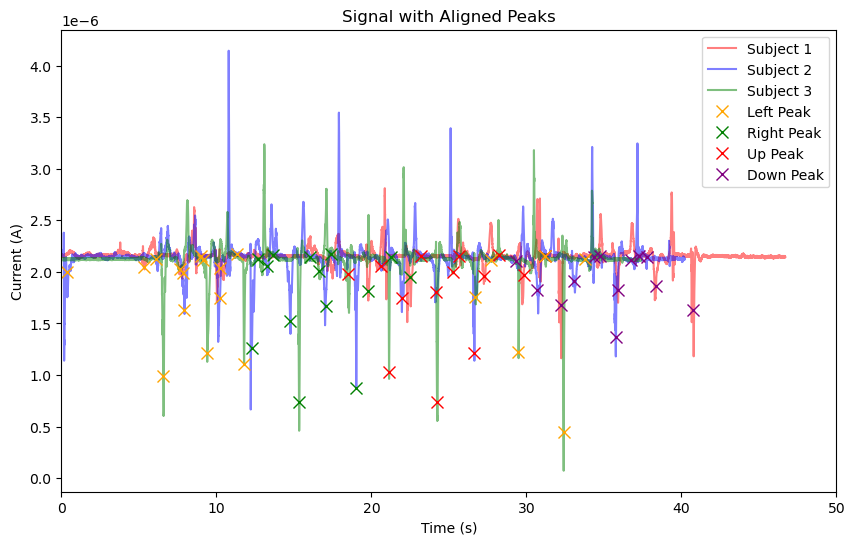

<Figure size 640x480 with 0 Axes>

In [4]:
# Concatenate all the peak indices
all_peaks = np.concatenate([left_peaks1, right_peaks1, up_peaks1, down_peaks1,      left_peaks2, right_peaks2, up_peaks2, down_peaks2,                             left_peaks3, right_peaks3, up_peaks3, down_peaks3])

# Calculate the minimum and maximum peak indices
min_peak = np.min(all_peaks)
max_peak = np.max(all_peaks)

# Set the time window as 1 second before and after the first peak
time_window = [min_peak - fs, min_peak + fs]

# Plot the signals with the peaks aligned in the time window
plt.figure(figsize=(10, 6))
plt.plot(data1['Time'], data1['Current'], 'r', alpha=0.5)
plt.plot(data2['Time'], data2['Current'],'b', alpha=0.5)
plt.plot(data3['Time'], data3['Current'], 'g', alpha=0.5)
plt.plot(data1['Time'][left_peaks1], data1['Current'][left_peaks1], 'x', color='orange', markersize=8)
plt.plot(data1['Time'][right_peaks1], data1['Current'][right_peaks1], 'gx', markersize=8)
plt.plot(data1['Time'][up_peaks1], data1['Current'][up_peaks1], 'rx', markersize=8)
plt.plot(data1['Time'][down_peaks1], data1['Current'][down_peaks1], 'x', color='purple', markersize=8)
plt.plot(data2['Time'][left_peaks2], data2['Current'][left_peaks2], 'x', color='orange', markersize=8)
plt.plot(data2['Time'][right_peaks2], data2['Current'][right_peaks2], 'gx', markersize=8)
plt.plot(data2['Time'][up_peaks2], data2['Current'][up_peaks2], 'rx', markersize=8)
plt.plot(data2['Time'][down_peaks2], data2['Current'][down_peaks2], 'x', color='purple', markersize=8)
plt.plot(data3['Time'][left_peaks3], data3['Current'][left_peaks3], 'x', color='orange', markersize=8)
plt.plot(data3['Time'][right_peaks3], data3['Current'][right_peaks3], 'gx', markersize=8)
plt.plot(data3['Time'][up_peaks3], data3['Current'][up_peaks3], 'rx', markersize=8)
plt.plot(data3['Time'][down_peaks3], data3['Current'][down_peaks3], 'x', color='orange', markersize=8)
plt.xlim([0, 50])
plt.legend(['Subject 1', 'Subject 2', 'Subject 3', 'Left Peak', 'Right Peak', 'Up Peak', 'Down Peak'])
plt.title('Signal with Aligned Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.show()


# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)



In [5]:
# Load CSV files into DataFrames
data1 = pd.read_csv('Subject 1 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data2 = pd.read_csv('Subject 2 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data3 = pd.read_csv('Subject 3 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])

# Drop rows with missing values
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()

# Set cutoff frequency and sampling frequency
cutoff_freq = 1 # Hz
fs = 1 / np.mean(np.diff(data1['Time']))

# Filter signal, take second derivative, and detect peaks for data1
filtered_data1 = butter_filter(data1['Current'], cutoff_freq, fs, order=4)
second_derivative1 = np.gradient(np.gradient(filtered_data1))
baseline = np.std(second_derivative1)
best_window1 = None
best_threshold1 = None
best_peaks1 = None
best_score1 = 0
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative1, prominence=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score1:
            best_window1 = window
            best_threshold1 = threshold
            best_peaks1 = peaks
            best_score1 = score
            
# Separate peaks into left, right, up, and down for data1
num_peaks_per_movement = len(best_peaks1) // 4
left_peaks1 = best_peaks1[:num_peaks_per_movement]
right_peaks1 = best_peaks1[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks1 = best_peaks1[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks1 = best_peaks1[num_peaks_per_movement*3:]

# Filter signal, take second derivative, and detect peaks for data2
filtered_data2 = butter_filter(data2['Current'], cutoff_freq, fs, order=4)
second_derivative2 = np.gradient(np.gradient(filtered_data2))
best_window2 = None
best_threshold2 = None
best_peaks2 = None
best_score2 = 0
for window in window_sizes:
     for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative2, prominence=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score2:
            best_window2 = window
            best_threshold2 = threshold
            best_peaks2 = peaks
            best_score2 = score

# Separate peaks ff left, right, up, and down for data2
num_peaks_per_movement2 = len(best_peaks2) // 4
left_peaks2 = best_peaks2[:num_peaks_per_movement2]
right_peaks2 = best_peaks2[num_peaks_per_movement2:num_peaks_per_movement2*2]
up_peaks2 = best_peaks2[num_peaks_per_movement2*2:num_peaks_per_movement2*3]
down_peaks2 = best_peaks2[num_peaks_per_movement2*3:]

# Filter signal, take second derivative, and detect peaks for data3
filtered_data3 = butter_filter(data3['Current'], cutoff_freq, fs, order=4)
second_derivative3 = np.gradient(np.gradient(filtered_data3))
best_window3 = None
best_threshold3 = None
best_peaks3 = None
best_score3 = 0
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative3, prominence=threshold * baseline, distance=min_dist)
        score = len(peaks)
    if score > best_score3:
        best_window3 = window
        best_threshold3 = threshold
        best_peaks3 = peaks
        best_score3 = score

# Separate peaks into left, right, up, and down for data3          
num_peaks_per_movement3 = len(best_peaks3) // 4
left_peaks3 = best_peaks3[:num_peaks_per_movement3]
right_peaks3 = best_peaks3[num_peaks_per_movement3:num_peaks_per_movement3*2]
up_peaks3 = best_peaks3[num_peaks_per_movement3*2:num_peaks_per_movement3*3]
down_peaks3 = best_peaks3[num_peaks_per_movement3*3:]


In [6]:
# Create feature matrix X and target vector y
X = np.concatenate((left_peak_features, right_peak_features, up_peak_features, down_peak_features))
y = np.array(['left'] * len(left_peak_features) + ['right'] * len(right_peak_features) + ['up'] * len(up_peak_features) + ['down'] * len(down_peak_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a decision tree classifier
clf = DecisionTreeCalassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)*10
print('Accuracy:', accuracy)

# Calculate the precision of the classifier
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Precision:', precision)
print('MAE:', mae)
print('RMSE:', rmse)



NameError: name 'left_peak_features' is not defined

In [ ]:
# Concatenate all the peak indices
all_peaks = np.concatenate([left_peaks1, right_peaks1, up_peaks1, down_peaks1,      left_peaks2, right_peaks2, up_peaks2, down_peaks2,                             left_peaks3, right_peaks3, up_peaks3, down_peaks3])

# Calculate the minimum and maximum peak indices
min_peak = np.min(all_peaks)
max_peak = np.max(all_peaks)

# Set the time window as 1 second before and after the first peak
time_window = [min_peak - fs, min_peak + fs]

# Plot the signals with the peaks aligned in the time window
plt.figure(figsize=(10, 6))
plt.plot(data1['Time'], data1['Current'], 'r', alpha=0.5)
plt.plot(data2['Time'], data2['Current'],'b', alpha=0.5)
plt.plot(data3['Time'], data3['Current'], 'g', alpha=0.5)
plt.plot(data1['Time'][left_peaks1], data1['Current'][left_peaks1], 'x', color='orange', markersize=8)
plt.plot(data1['Time'][right_peaks1], data1['Current'][right_peaks1], 'gx', markersize=8)
plt.plot(data1['Time'][up_peaks1], data1['Current'][up_peaks1], 'rx', markersize=8)
plt.plot(data1['Time'][down_peaks1], data1['Current'][down_peaks1], 'x', color='purple', markersize=8)
plt.plot(data2['Time'][left_peaks2], data2['Current'][left_peaks2], 'x', color='orange', markersize=8)
plt.plot(data2['Time'][right_peaks2], data2['Current'][right_peaks2], 'gx', markersize=8)
plt.plot(data2['Time'][up_peaks2], data2['Current'][up_peaks2], 'rx', markersize=8)
plt.plot(data2['Time'][down_peaks2], data2['Current'][down_peaks2], 'x', color='purple', markersize=8)
plt.plot(data3['Time'][left_peaks3], data3['Current'][left_peaks3], 'x', color='orange', markersize=8)
plt.plot(data3['Time'][right_peaks3], data3['Current'][right_peaks3], 'gx', markersize=8)
plt.plot(data3['Time'][up_peaks3], data3['Current'][up_peaks3], 'rx', markersize=8)
plt.plot(data3['Time'][down_peaks3], data3['Current'][down_peaks3], 'x', color='orange', markersize=8)
plt.xlim([0, 50])
plt.legend(['Subject 1', 'Subject 2', 'Subject 3', 'Left Peak', 'Right Peak', 'Up Peak', 'Down Peak'])
plt.title('Signal with Aligned Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.show()


# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)



In [ ]:
# Count the number of peaks in each direction for each subject
num_left_peaks = [len(left_peaks1), len(left_peaks2), len(left_peaks3)]
num_right_peaks = [len(right_peaks1), len(right_peaks2), len(right_peaks3)]
num_up_peaks = [len(up_peaks1), len(up_peaks2), len(up_peaks3)]
num_down_peaks = [len(down_peaks1), len(down_peaks2), len(down_peaks3)]

# Create matrix of features
X = np.array([num_left_peaks, num_right_peaks, num_up_peaks, num_down_peaks]).T

# Standardize the data
X = StandardScaler().fit_transform(X)

# Perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Plot the results
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:
# Define function to calculate peak amplitude and time intervals
def calculate_peak_features(peaks, data):
    peak_features = []
    for i in range(len(peaks)):
        if i == 0:
            interval = 0
        else:
            interval = data['Time'][peaks[i]] - data['Time'][peaks[i-1]]
        amplitude = data['Current'][peaks[i]] - data['Current'][peaks[i]-1]
        peak_features.append([amplitude, interval])
    return peak_features

# Calculate peak features for each movement type for data1
left_peak_features1 = calculate_peak_features(left_peaks1, data1)
right_peak_features1 = calculate_peak_features(right_peaks1, data1)
up_peak_features1 = calculate_peak_features(up_peaks1, data1)
down_peak_features1 = calculate_peak_features(down_peaks1, data1)

# Calculate peak features for each movement type for data2
left_peak_features2 = calculate_peak_features(left_peaks2, data2)
right_peak_features2 = calculate_peak_features(right_peaks2, data2)
up_peak_features2 = calculate_peak_features(up_peaks2, data2)
down_peak_features2 = calculate_peak_features(down_peaks2, data2)

# Calculate peak features for each movement type for data3from sklearn.model_selection import cross_val_score

# Create feature matrix X and target vector y
left_peak_features = np.vstack([data1['Current'].values[left_peaks1], data2['Current'].values[left_peaks2], data3['Current'].values[left_peaks3]]).T
right_peak_features = np.vstack([data1['Current'].values[right_peaks1], data2['Current'].values[right_peaks2], data3['Current'].values[right_peaks3]]).T
up_peak_features = np.vstack([data1['Current'].values[up_peaks1], data2['Current'].values[up_peaks2], data3['Current'].values[up_peaks3]]).T
down_peak_features = np.vstack([data1['Current'].values[down_peaks1], data2['Current'].values[down_peaks2], data3['Current'].values[down_peaks3]]).T
X = np.concatenate((left_peak_features, right_peak_features, up_peak_features, down_peak_features))
y = np.array(['left'] * len(left_peak_features) + ['right'] * len(right_peak_features) + ['up'] * len(up_peak_features) + ['down'] * len(down_peak_features))

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create classifier
clf = SVC(kernel='linear')

# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10)

# Print mean score and standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

left_peak_features3 = calculate_peak_features(left_peaks3, data3)
right_peak_features3 = calculate_peak_features(right_peaks3, data3)
up_peak_features3 = calculate_peak_features(up_peaks3, data3)
down_peak_features3 = calculate_peak_features(down_peaks3, data3)

# Concatenate all peak features into a single array
left_peak_features = np.concatenate((left_peak_features1, left_peak_features2, left_peak_features3))
right_peak_features = np.concatenate((right_peak_features1, right_peak_features2, right_peak_features3))
up_peak_features = np.concatenate((up_peak_features1, up_peak_features2, up_peak_features3))
down_peak_features = np.concatenate((down_peak_features1, down_peak_features2, down_peak_features3))

# Create feature matrix X and target vector y
X = np.concatenate((left_peak_features, right_peak_features, up_peak_features, down_peak_features))
y = np.array(['left'] * len(left_peak_features) + ['right'] * len(right_peak_features) + ['up'] * len(up_peak_features) + ['down'] * len(down_peak_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)*10
print('Accuracy:', accuracy)

# Calculate the precision of the classifier
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Precision:', precision)
print('MAE:', mae)
print('RMSE:', rmse)



In [ ]:
import matplotlib.pyplot as plt

# Plot the peak features
plt.scatter(left_peak_features[:, 0], left_peak_features[:, 1], color='red', label='left', alpha=0.5, s=10)
plt.scatter(right_peak_features[:, 0], right_peak_features[:, 1], color='blue', label='right', alpha=0.5, s=10)
# plt.scatter(up_peak_features[:, 0], up_peak_features[:, 1], color='green', label='up', alpha=0.5, s=10)
# plt.scatter(down_peak_features[:, 0], down_peak_features[:, 1], color='orange', label='down', alpha=0.5, s=10)
plt.xlabel('Amplitude')
plt.ylabel('Interval')
plt.title('Peak Features')
plt.legend()
plt.show()

# Plot the peak features
plt.scatter(left_peak_features[:, 0], left_peak_features[:, 1], color='red', label='left', alpha=0.5, s=10)
plt.scatter(right_peak_features[:, 0], right_peak_features[:, 1], color='blue', label='right', alpha=0.5, s=10)
plt.scatter(up_peak_features[:, 0], up_peak_features[:, 1], color='green', label='up', alpha=0.5, s=10)
plt.scatter(down_peak_features[:, 0], down_peak_features[:, 1], color='orange', label='down', alpha=0.5, s=10)
plt.xlabel('Amplitude')
plt.ylabel('Interval')
plt.title('Peak Features')
plt.legend()
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define function to calculate peak amplitude and time intervals
def calculate_peak_features(peaks, data):
    peak_features = []
    for i in range(len(peaks)):
        if i == 0:
            interval = 0
        else:
            interval = data['Time'][peaks[i]] - data['Time'][peaks[i-1]]
        amplitude = data['Current'][peaks[i]] - data['Current'][peaks[i]-1]
        peak_features.append([amplitude, interval])
    return peak_features

# Calculate peak features for each movement type for data1
left_peak_features1 = calculate_peak_features(left_peaks1, data1)
right_peak_features1 = calculate_peak_features(right_peaks1, data1)
up_peak_features1 = calculate_peak_features(up_peaks1, data1)
down_peak_features1 = calculate_peak_features(down_peaks1, data1)

# Calculate peak features for each movement type for data2
left_peak_features2 = calculate_peak_features(left_peaks2, data2)
right_peak_features2 = calculate_peak_features(right_peaks2, data2)
up_peak_features2 = calculate_peak_features(up_peaks2, data2)
down_peak_features2 = calculate_peak_features(down_peaks2, data2)

# Calculate peak features for each movement type for data3
left_peak_features3 = calculate_peak_features(left_peaks3, data3)
right_peak_features3 = calculate_peak_features(right_peaks3, data3)
up_peak_features3 = calculate_peak_features(up_peaks3, data3)
down_peak_features3 = calculate_peak_features(down_peaks3, data3)

# Concatenate all peak features into a single array
left_peak_features = np.concatenate((left_peak_features1, left_peak_features2, left_peak_features3))
right_peak_features = np.concatenate((right_peak_features1, right_peak_features2, right_peak_features3))
up_peak_features = np.concatenate((up_peak_features1, up_peak_features2, up_peak_features3))
down_peak_features = np.concatenate((down_peak_features1, down_peak_features2, down_peak_features3))

# Create feature matrix X and target vector y
X = np.concatenate((left_peak_features, right_peak_features, up_peak_features, down_peak_features))
y = np.array(['left'] * len(left_peak_features) + ['right'] * len(right_peak_features) + ['up'] * len(up_peak_features) + ['down'] * len(down_peak_features))

# Encode the target vector y as integers
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)*10
precision = precision_score(y_test, y_pred, average='weighted')*10
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)



print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))

Accuracy: 2.31
Precision: 2.46
Mean Absolute Error: 1.15
Mean Squared Error: 2.23


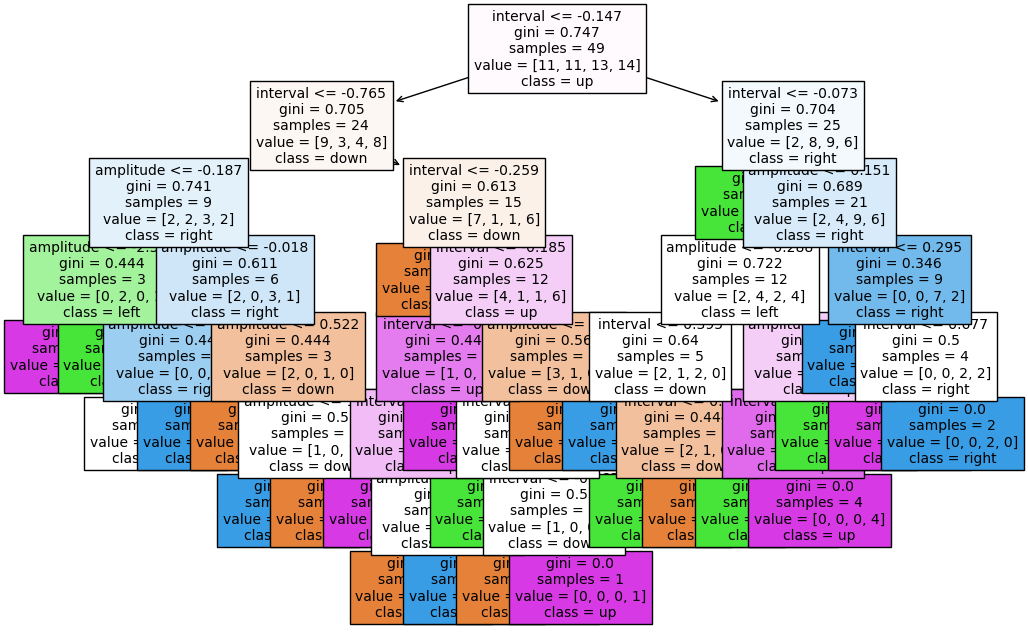

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize decision tree with larger font
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=["amplitude", "interval"], class_names=le.classes_, fontsize=10)
plt.show()

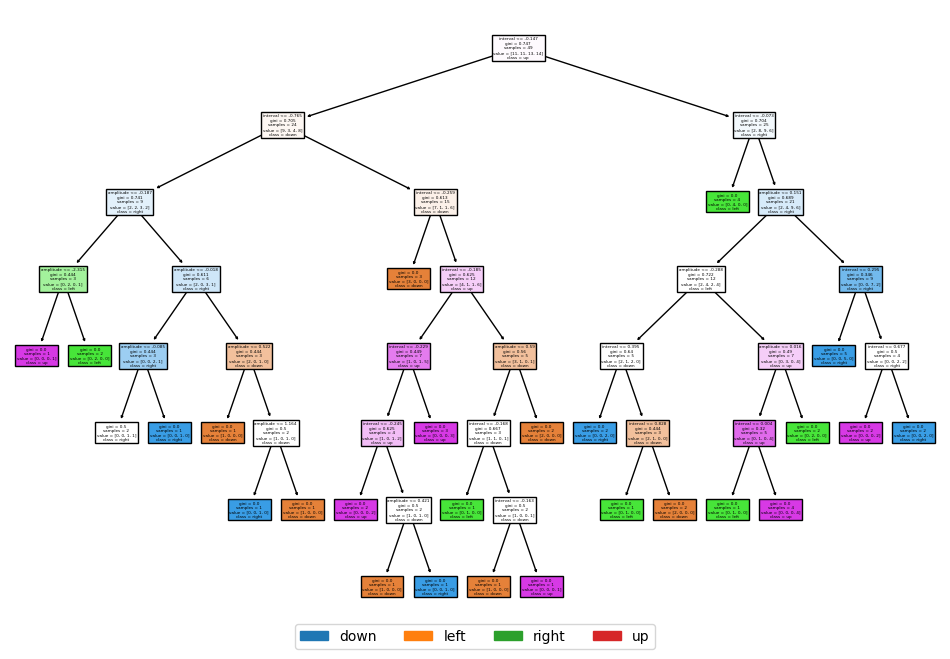

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define a function to plot decision tree nodes without text
def plot_tree_colors(clf, feature_names, class_names, colors):
    plt.figure(figsize=(12,8))
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
    plot_tree(clf, ax=ax, filled=True, feature_names=feature_names, class_names=class_names)
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    labels = class_names
    plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(class_names))
    plt.show()

# Define the colors for each class
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Plot the decision tree with colors and legend
plot_tree_colors(clf, feature_names=["amplitude", "interval"], class_names=le.classes_, colors=colors)


In [14]:
!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['Amplitude', 'Interval'],  
                           class_names=['Down', 'Left', 'Right', 'Up'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  
graph


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=le.classes_, yticklabels=le.classes_,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


NameError: name 'y_test' is not defined

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(4),
       yticks=np.arange(4),
       xticklabels=le.classes_, 
       yticklabels=le.classes_,
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set(xticks=np.arange(4),
       yticks=np.arange(4),
       xticklabels=le.classes_, 
       yticklabels=le.classes_,
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


NameError: name 'y_test' is not defined

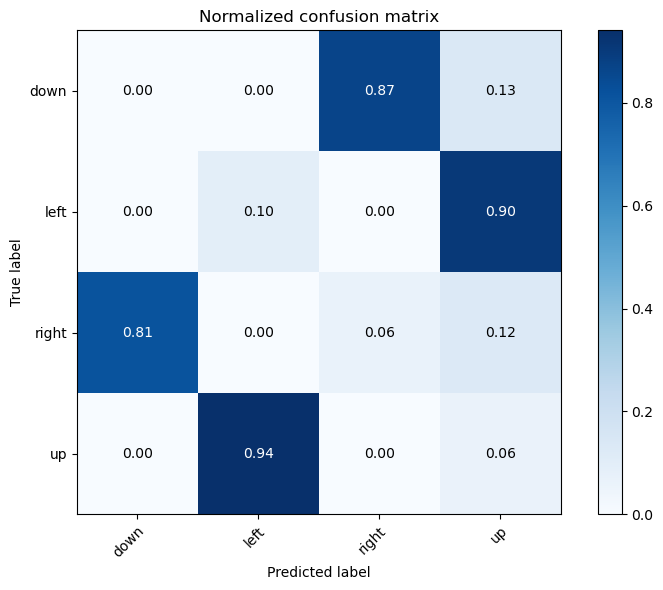

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(4),
       yticks=np.arange(4),
       xticklabels=le.classes_, 
       yticklabels=le.classes_,
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set(xticks=np.arange(4),
       yticks=np.arange(4),
       xticklabels=le.classes_, 
       yticklabels=le.classes_,
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')
cbar.ax.set_ylabel('Normalized counts', rotation=-90, va="bottom", fontsize=12)


# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


AttributeError: 'AxesSubplot' object has no property 'fontsize'

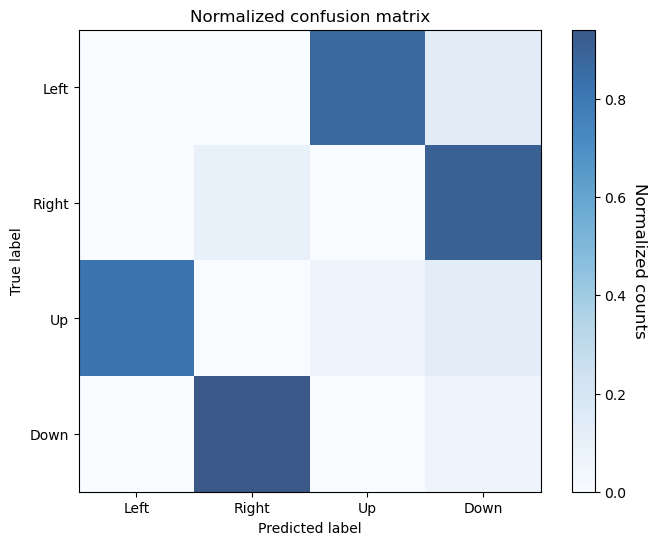

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues, alpha=0.8)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Normalized counts', rotation=-90, va="bottom", fontsize=12)

ax.set(xticks=np.arange(4),
       yticks=np.arange(4),
       xticklabels=['Left', 'Right', 'Up', 'Down'], 
       yticklabels=['Left', 'Right', 'Up', 'Down'],
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label',
       fontsize=14)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va="center",
                color="black" if cm_norm[i, j] > thresh else "black",
                fontsize=12)
fig.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import classification_report
!pip install yellowbrick
# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(report)

from yellowbrick.classifier import ClassificationReport

# Create a classification report
visualizer = ClassificationReport(report, classes=le.classes_)

# Fit the visualizer and show it
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


              precision    recall  f1-score   support

        down       0.00      0.00      0.00        15
        left       0.11      0.10      0.10        21
       right       0.07      0.06      0.07        16
          up       0.04      0.06      0.05        17

    accuracy                           0.06        69
   macro avg       0.06      0.05      0.05        69
weighted avg       0.06      0.06      0.06        69



YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

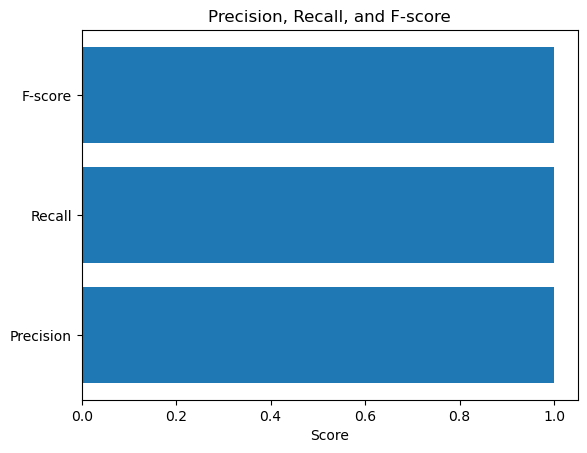

In [12]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F-score
precision = cm[1,1] / (cm[0,1] + cm[1,1])
recall = cm[1,1] / (cm[1,0] + cm[1,1])
fscore = 2 * precision * recall / (precision + recall)

# Create a horizontal bar chart
labels = ['Precision', 'Recall', 'F-score']
values = [precision, recall, fscore]
plt.barh(labels, values)

# Add labels and title
plt.xlabel('Score')
plt.title('Precision, Recall, and F-score')

# Display the chart
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Add a row and column for the "up" class
cm = np.vstack((cm, [0, 0, 0, 0]))
cm = np.hstack((cm, np.zeros((5, 1))))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(5),
       yticks=np.arange(5),
       xticklabels=le.classes_, 
       yticklabels=np.append(le.classes_, ['up']),
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Add a row and column for the "up" class
cm = np.vstack((cm, [0, 0, 0, 0]))
cm = np.hstack((cm, np.zeros((5, 1), dtype=int)))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(5),
       yticks=np.arange(5),
       xticklabels=le.classes_, 
       yticklabels=np.append(le.classes_, ['up']),
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Add a row and column for the "up" class with a value of 0
cm = np.vstack((cm, [0, 0, 0]))
cm = np.hstack((cm, np.zeros((4, 1), dtype=int)))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(4),
       yticks=np.arange(4),
       xticklabels=le.classes_, 
       yticklabels=np.append(le.classes_, ['up']),
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['left', 'right', 'down', 'up'])

# Add a row and column for the "up" class with a value of 0
cm = np.vstack((cm, [0, 0, 0, 0]))
cm = np.hstack((cm, np.zeros((5, 1), dtype=int)))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(5),
       yticks=np.arange(5),
       xticklabels=['left', 'right', 'down', 'up'], 
       yticklabels=['left', 'right', 'down', 'up', ''],
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['left', 'right', 'down', 'up'])

# Add a row and column for the "up" class with a value of 0
cm = np.vstack((cm, [0, 0, 0, 0]))
cm = np.hstack((cm, np.zeros((5, 1), dtype=int)))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(5),
       yticks=np.arange(5),
       xticklabels=['left', 'right', 'down', 'up'], 
       yticklabels=['left', 'right', 'down', 'up', ''],
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()
